# Clasificaciones usando muestra de tamaño 5000

In [1]:
import pickle

import numpy as np

import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from libs.container import Container
from libs.display import d
from libs.experiment import KFoldExperiment, WithAnotherExperiment, roc

In [2]:
sample = pd.read_pickle("data/ogle3_only/scaled/s5k.pkl")
sample["tile"] = sample["id"].apply(lambda i: "b" + str(i)[1:4])
sample["cls"] = sample.vs_type.apply(lambda x: 0 if x == "" else 1)

In [3]:
no_features = ["id", "vs_catalog", "vs_type", "ra_k", "dec_k", "tile", "cls"] 
X_columns = [c for c in sample.columns if c not in no_features]

grouped = sample.groupby("tile")
data = Container({k: grouped.get_group(k).copy() for k in grouped.groups.keys()})

del grouped, sample

## Features

In [4]:
cls = {0:0, 1:1}

In [5]:
d(X_columns)

1. cnt
2. Amplitude
3. AndersonDarling
4. Autocor_length
5. Beyond1Std
6. CAR_mean
7. CAR_sigma
8. CAR_tau
9. Con
10. Eta_e
11. FluxPercentileRatioMid20
12. FluxPercentileRatioMid35
13. FluxPercentileRatioMid50
14. FluxPercentileRatioMid65
15. FluxPercentileRatioMid80
16. Freq1_harmonics_amplitude_0
17. Freq1_harmonics_amplitude_1
18. Freq1_harmonics_amplitude_2
19. Freq1_harmonics_amplitude_3
20. Freq1_harmonics_rel_phase_0
21. Freq1_harmonics_rel_phase_1
22. Freq1_harmonics_rel_phase_2
23. Freq1_harmonics_rel_phase_3
24. LinearTrend
25. MaxSlope
26. Mean
27. Meanvariance
28. MedianAbsDev
29. MedianBRP
30. PairSlopeTrend
31. PercentAmplitude
32. PercentDifferenceFluxPercentile
33. PeriodLS
34. Period_fit
35. Psi_CS
36. Psi_eta
37. Q31
38. Rcs
39. Skew
40. SmallKurtosis
41. Std
42. StetsonK
43. c89_jk_color
44. c89_hk_color
45. c89_jh_color
46. n09_jk_color
47. n09_hk_color
48. n09_jh_color
49. c89_m2
50. c89_m4
51. c89_c3
52. n09_m2
53. n09_m4
54. n09_c3
55. AmplitudeH
56. AmplitudeJ
57. ppmb

## b278 - K-Folds

In [6]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      4983
        1.0       0.91      0.54      0.68       423

avg / total       0.96      0.96      0.96      5406

--------------------------------------------------------------------------------
CPU times: user 27.4 s, sys: 0 ns, total: 27.4 s
Wall time: 27.4 s


In [7]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_poly = svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97      4983
        1.0       0.85      0.45      0.59       423

avg / total       0.95      0.95      0.94      5406

--------------------------------------------------------------------------------
CPU times: user 15.2 s, sys: 0 ns, total: 15.2 s
Wall time: 15.2 s


In [8]:
%%time
svc_rbf = KFoldExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls,
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_rbf = svc_rbf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      4983
        1.0       0.91      0.53      0.67       423

avg / total       0.96      0.96      0.95      5406

--------------------------------------------------------------------------------
CPU times: user 19.4 s, sys: 0 ns, total: 19.4 s
Wall time: 19.4 s


In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      4983
        1.0       0.92      0.78      0.85       423

avg / total       0.98      0.98      0.98      5406

--------------------------------------------------------------------------------
CPU times: user 1min 37s, sys: 36 ms, total: 1min 37s
Wall time: 1min 37s


In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97      4983
        1.0       0.88      0.46      0.60       423

avg / total       0.95      0.95      0.95      5406

--------------------------------------------------------------------------------
CPU times: user 5.43 s, sys: 0 ns, total: 5.43 s
Wall time: 5.43 s


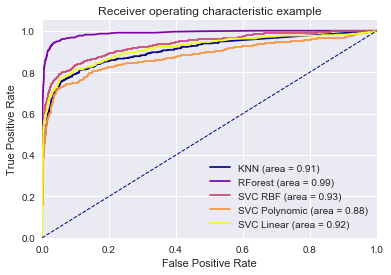

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC RBF": svc_rbf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

## b278 vs. Los demas

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.88      0.62      0.73       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.89      0.59      0.71       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4991
          1       0.86      0.69      0.76       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

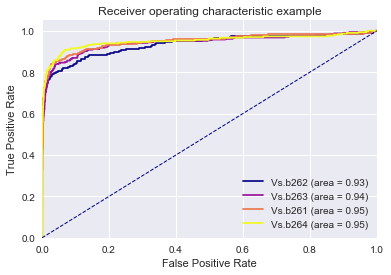

CPU times: user 14.9 s, sys: 220 ms, total: 15.1 s
Wall time: 14.9 s


In [12]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      4992
          1       0.85      0.57      0.69       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.82      0.51      0.63       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4991
          1       0.80      0.61      0.69       221

avg / total       0.97      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

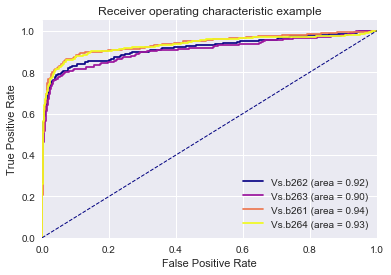

CPU times: user 9.3 s, sys: 264 ms, total: 9.56 s
Wall time: 9.26 s


In [13]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.91      0.62      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.89      0.57      0.70       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4991
          1       0.88      0.70      0.78       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

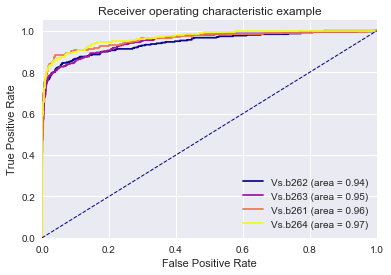

CPU times: user 12.5 s, sys: 252 ms, total: 12.7 s
Wall time: 12.4 s


In [14]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.96      0.79      0.87       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.97      0.78      0.86       305

avg / total       0.99      0.99      0.99      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      4991
          1       0.93      0.84      0.88       221

avg / total       0.99      0.99      0.99      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

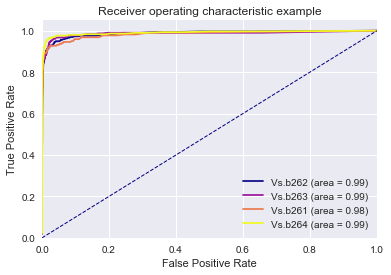

CPU times: user 44.7 s, sys: 516 ms, total: 45.2 s
Wall time: 44.7 s


In [15]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      4992
          1       0.84      0.59      0.70       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.80      0.51      0.63       305

avg / total       0.96      0.96      0.96      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4991
          1       0.80      0.61      0.69       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

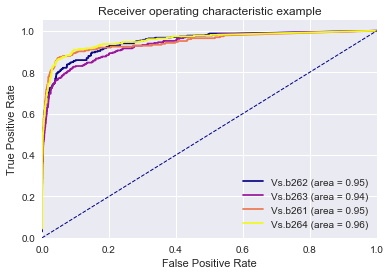

CPU times: user 19.9 s, sys: 232 ms, total: 20.2 s
Wall time: 19.9 s


In [16]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b278"))

## b261 vs. Los demas

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.91      0.63      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.63      0.75       305

avg / total       0.97      0.98      0.97      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4983
          1       0.94      0.49      0.64       423

avg / total       0.96      0.96      0.95      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

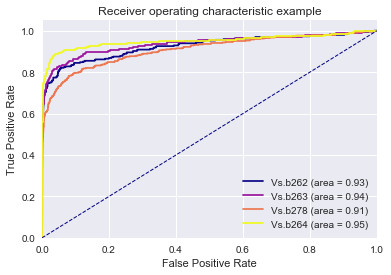

CPU times: user 6.16 s, sys: 244 ms, total: 6.4 s
Wall time: 6.11 s


In [17]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4992
          1       0.93      0.53      0.68       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.87      0.49      0.63       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      4983
          1       0.94      0.39      0.55       423

avg / total       0.95      0.95      0.94      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

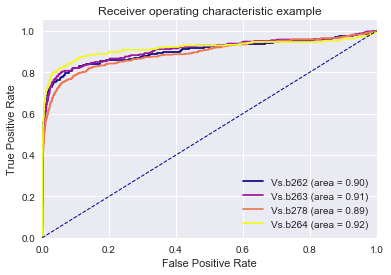

CPU times: user 4.81 s, sys: 200 ms, total: 5.01 s
Wall time: 4.71 s


In [18]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.97      0.59      0.73       296

avg / total       0.98      0.98      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4997
          1       0.92      0.56      0.70       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4983
          1       0.94      0.48      0.64       423

avg / total       0.96      0.96      0.95      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

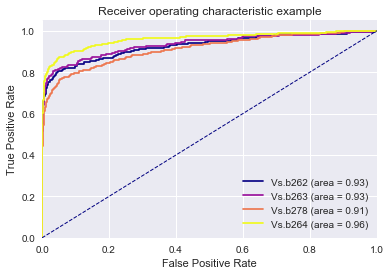

CPU times: user 6.82 s, sys: 248 ms, total: 7.07 s
Wall time: 6.77 s


In [19]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.98      0.73      0.84       296

avg / total       0.98      0.98      0.98      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.99      0.73      0.84       305

avg / total       0.98      0.98      0.98      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4983
          1       0.97      0.67      0.79       423

avg / total       0.97      0.97      0.97      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

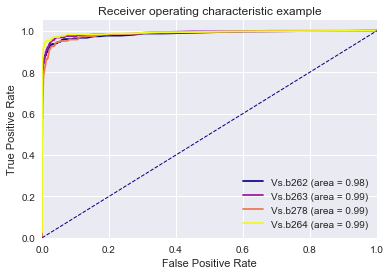

CPU times: user 40.7 s, sys: 596 ms, total: 41.3 s
Wall time: 40.7 s


In [20]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4992
          1       0.90      0.50      0.65       296

avg / total       0.97      0.97      0.96      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.88      0.46      0.61       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      4983
          1       0.93      0.40      0.56       423

avg / total       0.95      0.95      0.94      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

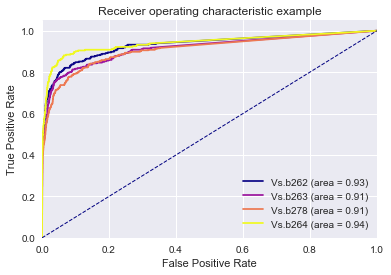

CPU times: user 21.4 s, sys: 256 ms, total: 21.7 s
Wall time: 21.4 s


In [21]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b261"))

## b278 + b261 vs. Los demas

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.91      0.62      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.90      0.60      0.72       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.94      0.65      0.77       294

avg / total       0.98      0.98      0.98      5292

--------------------------------------------------------------------------------


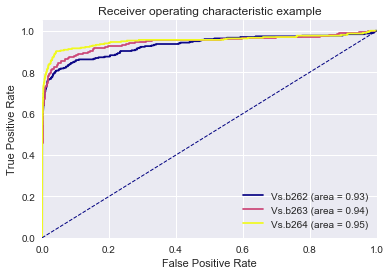

CPU times: user 34.7 s, sys: 320 ms, total: 35 s
Wall time: 34.8 s


In [22]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.92      0.58      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.88      0.53      0.66       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4998
          1       0.91      0.56      0.69       294

avg / total       0.97      0.97      0.97      5292

--------------------------------------------------------------------------------


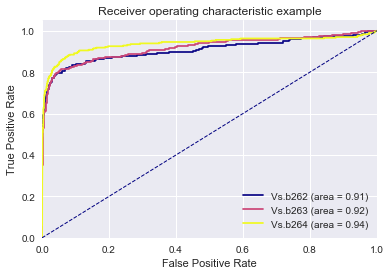

CPU times: user 22.3 s, sys: 256 ms, total: 22.6 s
Wall time: 22.3 s


In [23]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.95      0.64      0.76       296

avg / total       0.98      0.98      0.98      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.59      0.72       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.96      0.63      0.76       294

avg / total       0.98      0.98      0.98      5292

--------------------------------------------------------------------------------


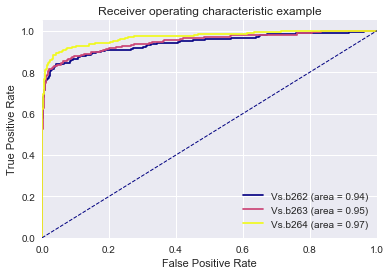

CPU times: user 26.4 s, sys: 252 ms, total: 26.7 s
Wall time: 26.4 s


In [24]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.97      0.79      0.87       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.98      0.79      0.87       305

avg / total       0.99      0.99      0.99      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4998
          1       0.98      0.85      0.91       294

avg / total       0.99      0.99      0.99      5292

--------------------------------------------------------------------------------


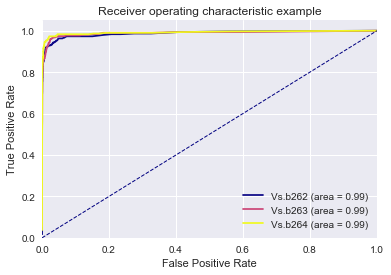

CPU times: user 1min 5s, sys: 428 ms, total: 1min 6s
Wall time: 1min 5s


In [25]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.86      0.59      0.70       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.83      0.51      0.63       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      4998
          1       0.85      0.57      0.69       294

avg / total       0.97      0.97      0.97      5292

--------------------------------------------------------------------------------


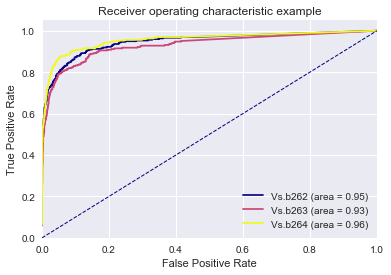

CPU times: user 36.9 s, sys: 232 ms, total: 37.2 s
Wall time: 36.9 s


In [26]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261"]))

## b278 + b261 + b264 vs. Los demas

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.88      0.64      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.62      0.74       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------


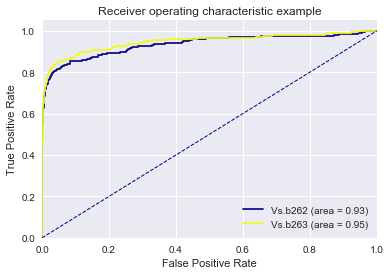

CPU times: user 47.9 s, sys: 596 ms, total: 48.5 s
Wall time: 48.2 s


In [27]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.89      0.59      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.88      0.55      0.68       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------


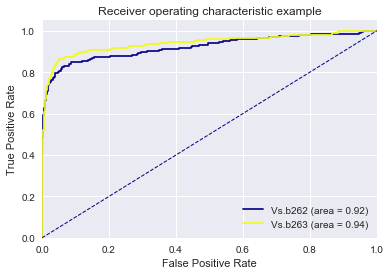

CPU times: user 33 s, sys: 504 ms, total: 33.5 s
Wall time: 33.2 s


In [28]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.94      0.65      0.77       296

avg / total       0.98      0.98      0.98      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.95      0.63      0.76       305

avg / total       0.98      0.98      0.97      5302

--------------------------------------------------------------------------------


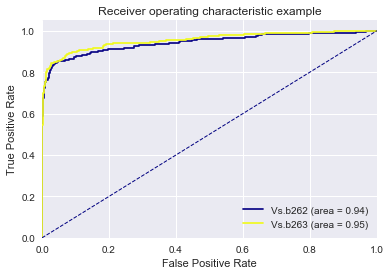

CPU times: user 36.2 s, sys: 540 ms, total: 36.7 s
Wall time: 36.5 s


In [29]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.97      0.81      0.88       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.98      0.79      0.87       305

avg / total       0.99      0.99      0.99      5302

--------------------------------------------------------------------------------


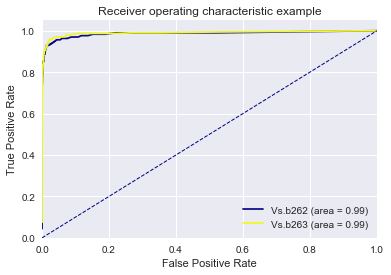

CPU times: user 1min 7s, sys: 308 ms, total: 1min 7s
Wall time: 1min 7s


In [30]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.86      0.62      0.72       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.82      0.56      0.67       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------


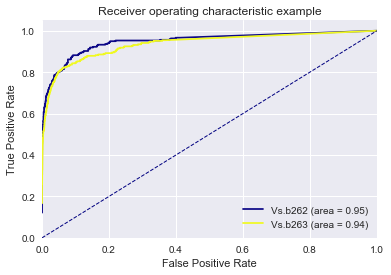

CPU times: user 47.7 s, sys: 228 ms, total: 47.9 s
Wall time: 47.6 s


In [31]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261", "b264"]))